# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | port saint john's
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | chinde
Processing Record 6 of Set 1 | berezovyy
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | dazhong
Processing Record 10 of Set 1 | sinop
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | st. john's
Processing Record 13 of Set 1 | fukuecho
Processing Record 14 of Set 1 | chegdomyn
Processing Record 15 of Set 1 | as samawah
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | tamanrasset
Processing Record 20 of Set 1 | pangai
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of Set 1 | tshikapa
Processi

Processing Record 39 of Set 4 | chonchi
Processing Record 40 of Set 4 | cadale
Processing Record 41 of Set 4 | ploudalmezeau
Processing Record 42 of Set 4 | punta arenas
Processing Record 43 of Set 4 | atbara
Processing Record 44 of Set 4 | houdain
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | dabola
Processing Record 47 of Set 4 | mitsamiouli
Processing Record 48 of Set 4 | taldykorgan
Processing Record 49 of Set 4 | bykovo
Processing Record 0 of Set 5 | deschutes river woods
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | bandon
Processing Record 3 of Set 5 | tarauaca
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | iskateley
Processing Record 6 of Set 5 | yaren
Processing Record 7 of Set 5 | zhanga buqtyrma
Processing Record 8 of Set 5 | le port
Processing Record 9 of Set 5 | las tablas
Processing Record 10 of Set 5 | plettenberg bay
Processing Record 11 of Set 5 | qaqortoq
Processing Record 12 of Set 5 | ca

Processing Record 26 of Set 8 | ghat
Processing Record 27 of Set 8 | callao
Processing Record 28 of Set 8 | tucupita
Processing Record 29 of Set 8 | ad dilam
Processing Record 30 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 31 of Set 8 | cangucu
Processing Record 32 of Set 8 | nampa
Processing Record 33 of Set 8 | wakkanai
Processing Record 34 of Set 8 | sylva
Processing Record 35 of Set 8 | hithadhoo
Processing Record 36 of Set 8 | bacalar
Processing Record 37 of Set 8 | beroroha
Processing Record 38 of Set 8 | selfoss
Processing Record 39 of Set 8 | hotan
Processing Record 40 of Set 8 | scottburgh
Processing Record 41 of Set 8 | slobodskoy
Processing Record 42 of Set 8 | ancud
Processing Record 43 of Set 8 | lago da pedra
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | maitum
Processing Record 46 of Set 8 | calbuco
Processing Record 47 of Set 8 | vorkuta
Processing Record 48 of Set 8 | quarai
Processing Record 49 of Set 8 | tranovaho
City 

Processing Record 16 of Set 12 | gummi
Processing Record 17 of Set 12 | mokhsogollokh
Processing Record 18 of Set 12 | alamogordo
Processing Record 19 of Set 12 | egilsstadir
Processing Record 20 of Set 12 | al 'alamayn
City not found. Skipping...
Processing Record 21 of Set 12 | colonel hill
Processing Record 22 of Set 12 | bodaybo
Processing Record 23 of Set 12 | cuajinicuilapa
Processing Record 24 of Set 12 | luena
Processing Record 25 of Set 12 | astara
Processing Record 26 of Set 12 | as sulayyil
Processing Record 27 of Set 12 | suomussalmi
Processing Record 28 of Set 12 | tabas
Processing Record 29 of Set 12 | khasavyurt
Processing Record 30 of Set 12 | kenai
Processing Record 31 of Set 12 | moab
Processing Record 32 of Set 12 | mason city
Processing Record 33 of Set 12 | mgandu
Processing Record 34 of Set 12 | khandyga
Processing Record 35 of Set 12 | raja
Processing Record 36 of Set 12 | mil'kovo
Processing Record 37 of Set 12 | newman
Processing Record 38 of Set 12 | dili
Proc

In [116]:
city_weather

{'coord': {'lon': 22.7333, 'lat': 37.6333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 296.92,
  'feels_like': 297.05,
  'temp_min': 296.92,
  'temp_max': 299.14,
  'pressure': 1009,
  'humidity': 65,
  'sea_level': 1009,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 2.64, 'deg': 291, 'gust': 3.12},
 'clouds': {'all': 0},
 'dt': 1691364360,
 'sys': {'type': 2,
  'id': 2040196,
  'country': 'GR',
  'sunrise': 1691379450,
  'sunset': 1691429538},
 'timezone': 10800,
 'id': 264670,
 'name': 'Argos',
 'cod': 200}

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,266.68,86,100,2.76,GS,1691364100
1,invercargill,-46.4000,168.3500,280.38,92,73,2.68,NZ,1691364100
2,port saint john's,-31.6229,29.5448,291.31,85,8,5.45,ZA,1691364101
3,afaahiti,-17.7500,-149.2833,301.08,75,40,4.58,PF,1691364101
4,chinde,26.8418,88.0763,292.36,90,100,0.88,NP,1691364101


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,266.68,86,100,2.76,GS,1691364100
1,invercargill,-46.4000,168.3500,280.38,92,73,2.68,NZ,1691364100
2,port saint john's,-31.6229,29.5448,291.31,85,8,5.45,ZA,1691364101
3,afaahiti,-17.7500,-149.2833,301.08,75,40,4.58,PF,1691364101
4,chinde,26.8418,88.0763,292.36,90,100,0.88,NP,1691364101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

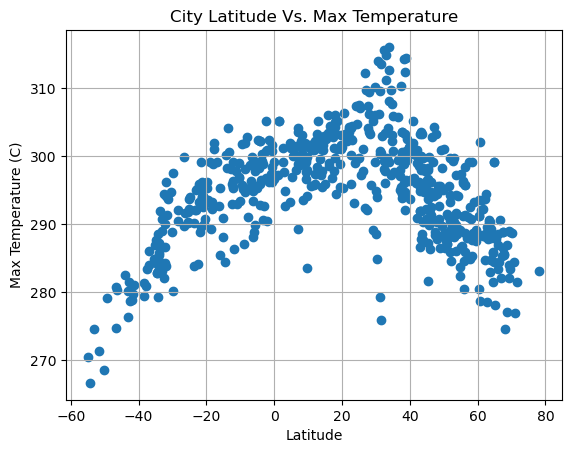

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

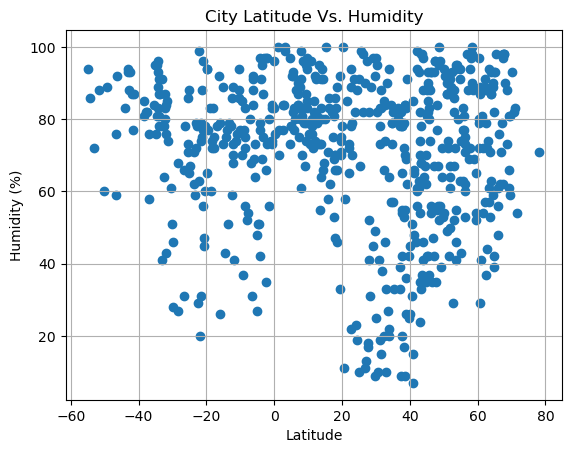

In [9]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

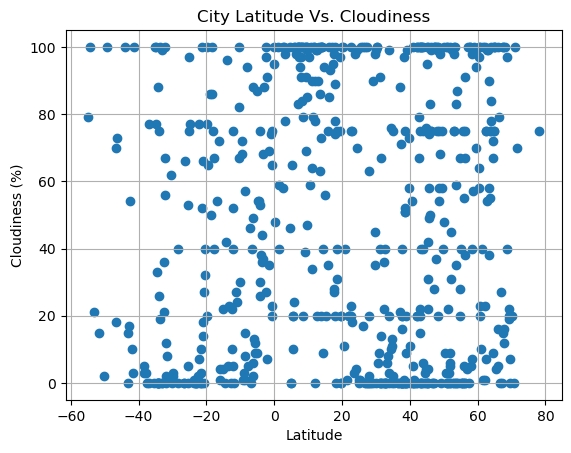

In [10]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

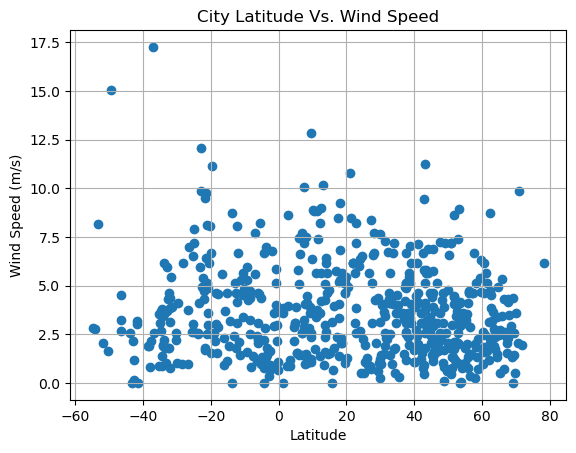

In [11]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plot
def lrgPlot(x,y,e,z):
    results = linregress(x,y)
    rvalue = round(results.rvalue, 2)
    regress_values = x * results.slope + results.intercept
    line_equ = "y = " + str(round(results.slope, 2)) + "x +" + str(round(results.intercept,2))
    
    print(f"The r-value is: {rvalue}")
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.title(f"{e} Latitude vs {z}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{z}")
    plt.annotate(line_equ, (20,15), fontsize=10, color="red")
    plt.show()
    
    return

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,chinde,26.8418,88.0763,292.36,90,100,0.88,NP,1691364101
5,berezovyy,51.6667,135.7000,295.54,42,3,1.72,RU,1691364101
8,dazhong,33.1997,120.4578,299.68,90,6,4.25,CN,1691364102
9,sinop,41.7711,34.8709,296.10,46,0,1.72,TR,1691364103
11,st. john's,47.5649,-52.7093,288.86,96,100,2.57,CA,1691364033


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,266.68,86,100,2.76,GS,1691364100
1,invercargill,-46.4000,168.3500,280.38,92,73,2.68,NZ,1691364100
2,port saint john's,-31.6229,29.5448,291.31,85,8,5.45,ZA,1691364101
3,afaahiti,-17.7500,-149.2833,301.08,75,40,4.58,PF,1691364101
6,port-aux-francais,-49.3500,70.2167,279.11,89,100,15.03,TF,1691364102


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.61


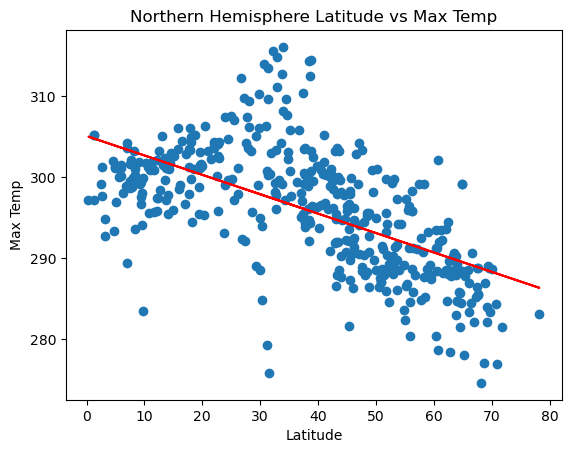

In [105]:
# Linear regression on Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], e = str("Northern Hemisphere"), z = str("Max Temp"))

The r-value is: 0.81


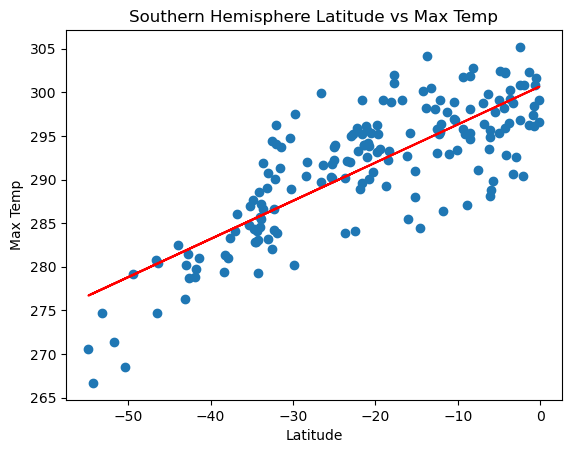

In [106]:
# Linear regression on Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], e = str("Southern Hemisphere"), z = str("Max Temp") )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07


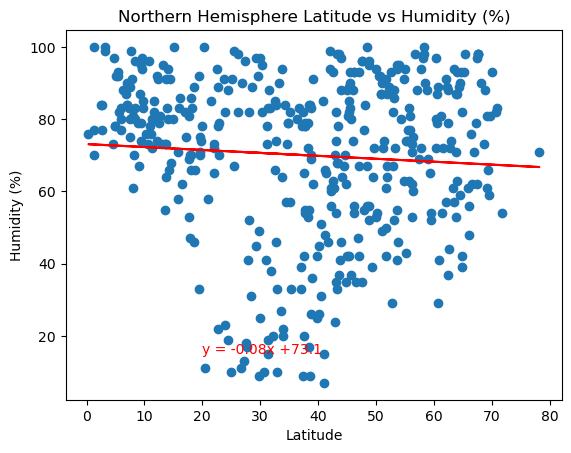

In [107]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], e = str("Northern Hemisphere"), z = str("Humidity (%)"))

The r-value is: -0.15


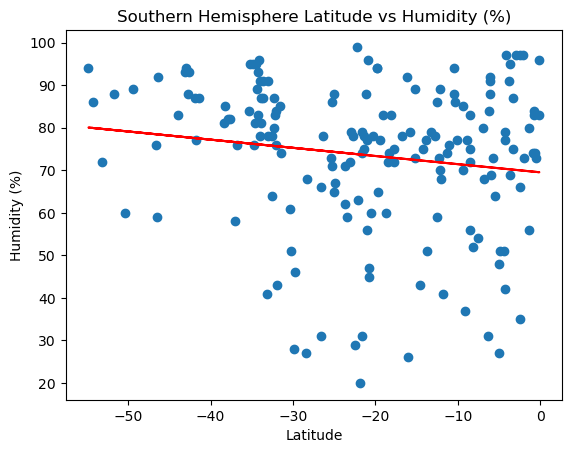

In [108]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], e = str("Southern Hemisphere"), z = str("Humidity (%)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.15


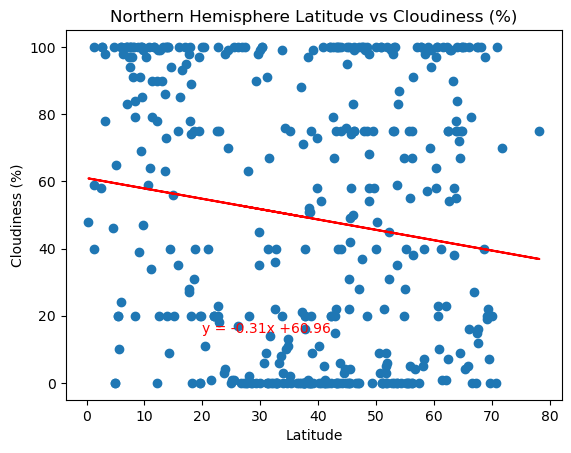

In [113]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], e = str("Northern Hemisphere"), z = str("Cloudiness (%)"))

The r-value is: 0.1


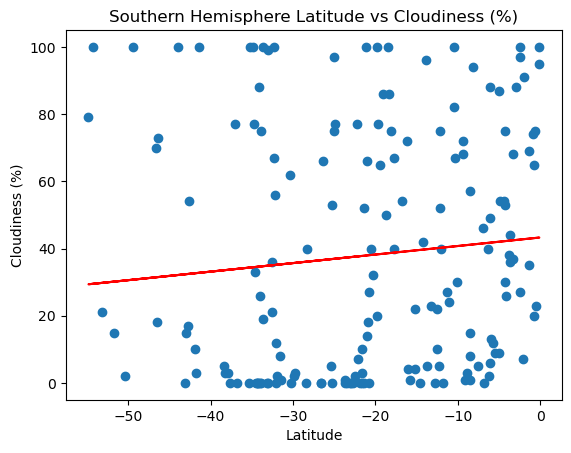

In [112]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], e = str("Southern Hemisphere"), z = str("Cloudiness (%)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18


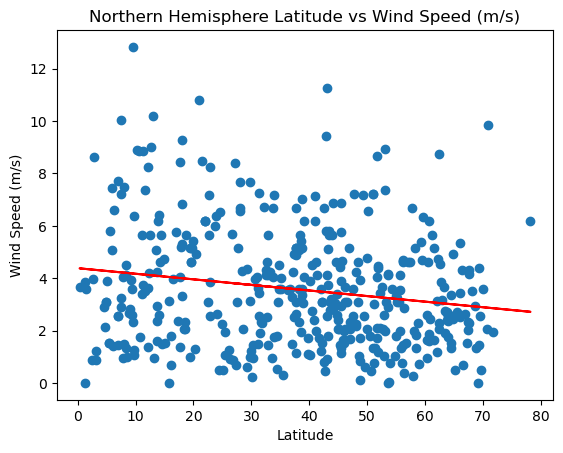

In [114]:
# Northern Hemisphere
lrgPlot(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], e = str("Northern Hemisphere"), z = str("Wind Speed (m/s)"))

The r-value is: -0.04


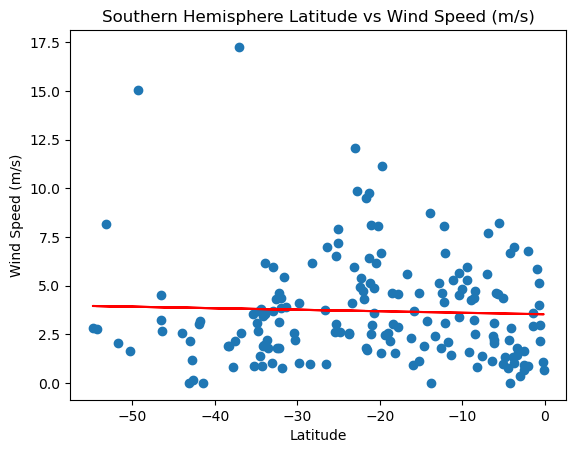

In [115]:
# Southern Hemisphere
lrgPlot(x = southern_hemi_df["Lat"], y = southern_hemi_df["Wind Speed"], e = str("Southern Hemisphere"), z = str("Wind Speed (m/s)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE